# CROSETTO Luca & LONGEOT Antonin - SIA 

# TP3 : Ensemble methods and feature selection

In this lab, we are going to explore the performances of different ensemble methods and feature selection methods, in different datasets. 

Objectives :

 - Investigate the performances of different ensemble methods
 - Investigate the influence of the hyperparameters of the models and of the data characteristics
 - Visualize the boundary decisions methods
 - Report correctly the results
 - Analyze and discuss results on an applicative dataset



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np


# Part 1 : Ensemble methods on toy dataset 

## Subpart 1 : dataset generation

In this first part, you are going to evaluate the performances of ensemble methods.

First, by using the [make_classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, generate a dataset of 100 points with 2 informative features. Also, by using the [train_test_split](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) function, split your dataset in a training and a test set by putting 67% of data's in training and 33% of data's in test. 

You can use random_state = 123 in order to fix the randomness.

    Q1 : quickly explain why we separate the training set from the test set.

In [123]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Generate a dataset of 100 points with 2 informative features 
x, y = make_classification(n_samples=100,n_features=2, n_informative=2 ,n_redundant=0,n_repeated=0,random_state=123)
print("\nlen(y) =",len(y))

#Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)
print("len(Train) =",len(X_train),"\nlen(test) =",len(X_test))


len(y) = 100
len(Train) = 67 
len(test) = 33


### Q1
We separate the training set from the test set to organize the dataset and get the best model accuracy. 

By evaluating on data never seen during training, we obtain a more accurate estimate of the model's performance on new data, thus avoiding the risk of overfitting

## Subpart 2 : model evaluation

Now, apply different ensemble methods on this dataset. The ensemble methods you will evaluate are :
 - decision tree with max depth = 3
 - random forest with 3 estimators
 - adaboost classifier with 20 estimators
 - bagging classifier with 10 estimators. 

For each model, train in on the training dataset and evaluate it on the test dataset. Also, use the [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) in order to plot the boundary decisions.

    Q2 : briefly explain each model , and the hyperparameters used.
    Q3 : Also, analyze and explain the differences between each boundary decision
    Q4 : Finally, report both training and test accuracy in a tabular and discuss them

[0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1] 
 [0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1]


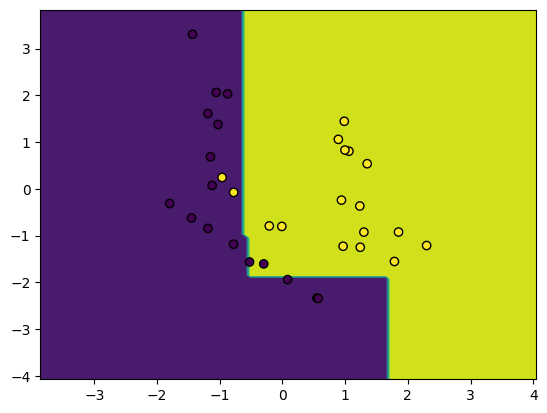

In [118]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# decision tree with max depth = 3
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

y_pred = np.reshape(tree.predict(X_test), len(X_test))
print(y_pred,"\n",y_test) #// To see the different results but we don't use "y_pred" with from_estimator

accuracy = accuracy_score(y_test,y_pred)


display = DecisionBoundaryDisplay.from_estimator(
    tree, X_train, response_method="predict"
)

display.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")


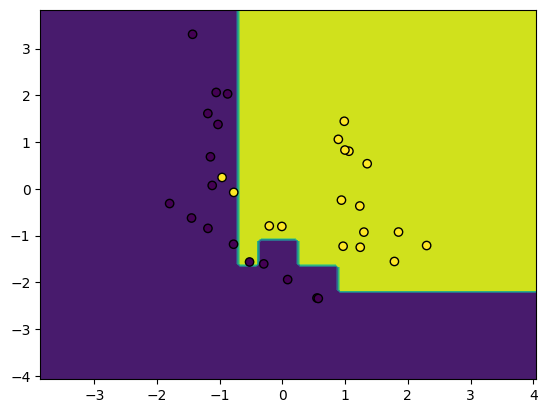

In [119]:
from sklearn.ensemble import RandomForestClassifier
# Random forest estimators = 3
forest = RandomForestClassifier(
    n_estimators=3).fit(X_train, y_train)

y_pred_forest = np.reshape(forest.predict(X_test), len(X_test))
accuracy_forest = accuracy_score(y_test,y_pred_forest)

display_forest = DecisionBoundaryDisplay.from_estimator(
    forest, X_train, response_method="predict"
)

display_forest.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")


c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


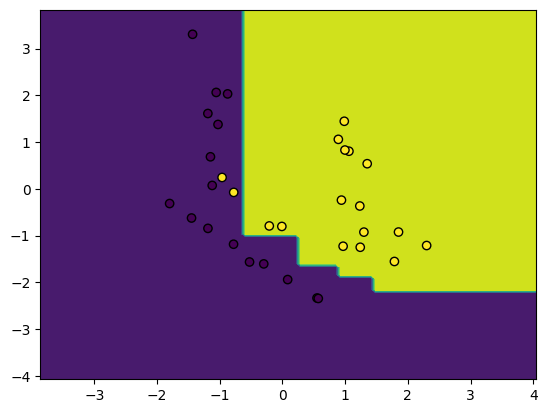

In [120]:
from sklearn.ensemble import AdaBoostClassifier
# Adaboost classifier with 20 estimators
ada = AdaBoostClassifier(
    n_estimators=20).fit(X_train, y_train)

y_pred_ada = np.reshape(ada.predict(X_test), len(X_test))
accuracy_ada = accuracy_score(y_test,y_pred_ada)

display_ada = DecisionBoundaryDisplay.from_estimator(
    ada, X_train, response_method="predict"
)

display_ada.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")

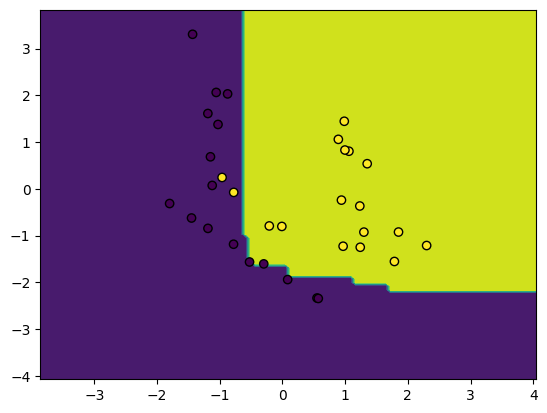

In [121]:
from sklearn.ensemble import BaggingClassifier
# Adaboost classifier with 10 estimators
bagg = BaggingClassifier(
    n_estimators=10).fit(X_train, y_train)

y_pred_bagg = np.reshape(bagg.predict(X_test), len(X_test))
accuracy_bagg = accuracy_score(y_test,y_pred_bagg)

display_bagg = DecisionBoundaryDisplay.from_estimator(
    bagg, X_train, response_method="predict"
)

display_bagg.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")

### Q2

**Decision Tree :**

Classification model that segments data according to separation criteria.
Hyperparameter: max_depth=3, to limit the depth of the tree and avoid overfitting.

**Random Forest :**

Set of several decision trees, each trained on a subset of the data.
Hyperparameter: n_estimators=10, indicates the number of trees in the forest.

**AdaBoost :**

Boosting algorithm that combines several shallow decision trees (weak models).
Hyperparameter: n_estimators=20, the number of iterations to improve the performance.

**Bagging :**

Bagging aggregation technique that uses bootstrap samples to create subsets.
Hyperparameter: n_estimators=10, indicates the number of models in the set.


### Q3

**Decision Tree:**  Frontier cut into rectangular segments. The max depth is on 3, that means at maximum 8 nodes for this case (8 hyperplanes). Here we can see that the max_depth seems to not bee reached because of a good separation of the values. 

**Random Forest:** smoother boundary thanks to the aggregation of several trees. Frontier follow rectangular segements too based on trees. 

**AdaBoost:** More complex frontier, adaptive to points that are difficult to classify.

**Bagging:** Similar to Random Forest but potentially simpler, as it uses less diversity between trees.

### Q4

In [135]:
print("Decision tree accuracy =",accuracy)
print("Random forest accuracy=",accuracy_forest)
print("AdaBoost accuracy =",accuracy_ada)
print("Bagging accuracy =",accuracy_bagg)

Decision tree accuracy = 0.9090909090909091
Random forest accuracy= 0.9090909090909091
AdaBoost accuracy = 0.9393939393939394
Bagging accuracy = 0.9090909090909091


Differences in accuracy may indicate a tendency to overfitting or underfitting, depending on the models and features selected.

## Subpart 3 : make blobs

Repeat previous exercises, by replacing the dataset with [make blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)  with 500 samples, two
classes (thus two centers) in the input parameters and random state = 123.

    Q5 : In which of the two datasets is the usage of ensembles more beneficiary, and why?
    Q6 : When might a single model yield better performance than an ensemble?


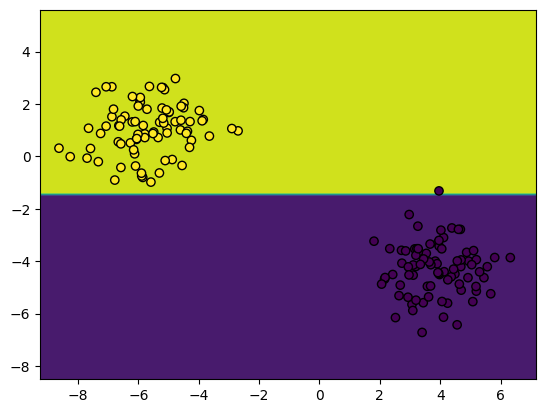

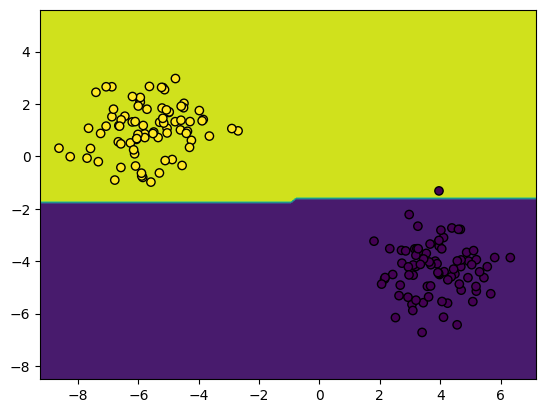

c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


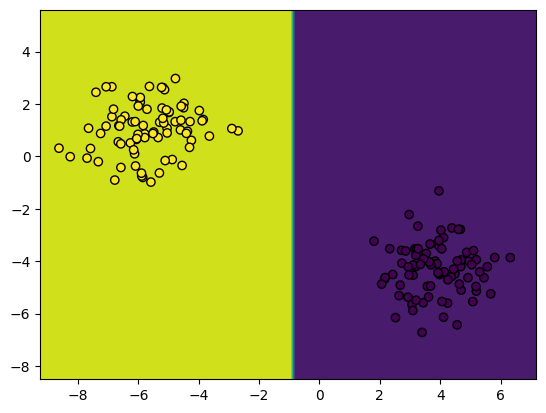

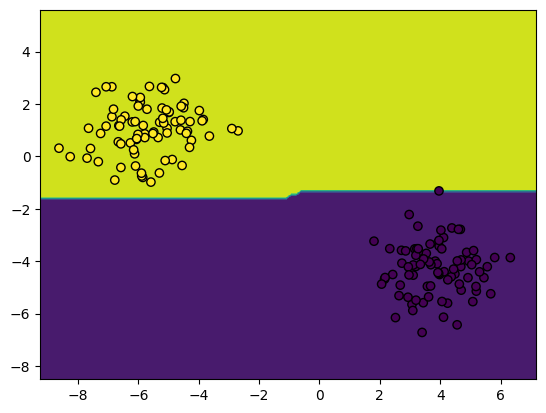

In [136]:
from sklearn.datasets import make_blobs
x_blobs, y_blobs = make_blobs(n_samples=500, centers=2, n_features=2,random_state=123)
x_train_blobs, x_test_blobs, y_train_blobs, y_test_blobs = train_test_split( x_blobs, y_blobs, test_size=0.33, random_state=123)

tree = DecisionTreeClassifier(max_depth=3).fit(x_train_blobs,y_train_blobs)
disp = DecisionBoundaryDisplay.from_estimator(tree, x_train_blobs, response_method="predict")
disp.ax_.scatter(x_test_blobs[:, 0], x_test_blobs[:, 1], c=y_test_blobs, edgecolor="k")
plt.show()

forest = RandomForestClassifier(n_estimators=3).fit(x_train_blobs,y_train_blobs)
disp = DecisionBoundaryDisplay.from_estimator(forest, x_train_blobs, response_method="predict")
disp.ax_.scatter(x_test_blobs[:, 0], x_test_blobs[:, 1], c=y_test_blobs, edgecolor="k")
plt.show()

ada = AdaBoostClassifier(n_estimators=20).fit(x_train_blobs,y_train_blobs)
disp = DecisionBoundaryDisplay.from_estimator(ada, x_train_blobs, response_method="predict")
disp.ax_.scatter(x_test_blobs[:, 0], x_test_blobs[:, 1], c=y_test_blobs, edgecolor="k")
plt.show()

bagging = BaggingClassifier(n_estimators=10).fit(x_train_blobs,y_train_blobs)
disp = DecisionBoundaryDisplay.from_estimator(bagging, x_train_blobs, response_method="predict")
disp.ax_.scatter(x_test_blobs[:, 0], x_test_blobs[:, 1], c=y_test_blobs, edgecolor="k")
plt.show()

### Q5

The use of sets is generally more beneficial on the make_blobs set, as it presents more distinct clusters. Sets help to capture more complex separations between classes and reduce the variance.

### Q6

A single model can outperform an ensemble when the data is very well structured, linearly separable, and of low complexity, as ensembles can introduce unnecessary variance or complexity.

# Part 2 : Feature selection on toy dataset

In this second part, you are going to evaluate different feature selection methods. First, by using once again the [make classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, compute a dataset with 100 samples, 10 features with 2 informative and 2 redundant. Split your dataset in training and test.

Then, apply different feature selection methods in order to find back which features are informatives. The methods you will aply are the following :
 - By using the feature importance reported by the different classifiers
 - Principal Component Analysis
 - Variance Threshold
 - Recursive Feature Elimination
 
For each feature selection method, use the 2 best selected features, and train a new model using only those features. The model you will use are the ones evaluated in the previous part.

    Q7 : For each feature selection method, briefly explain how they work
    Q8 : Report the results you obtain in a tabular. Analyze and discuss the results you obtain.



c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


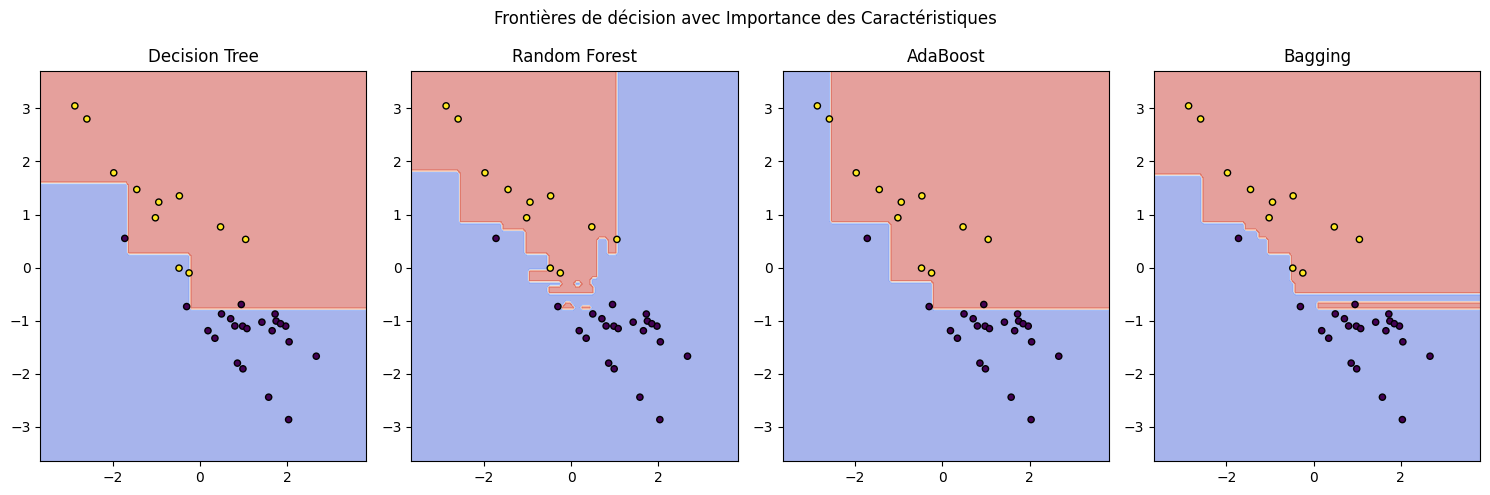

c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


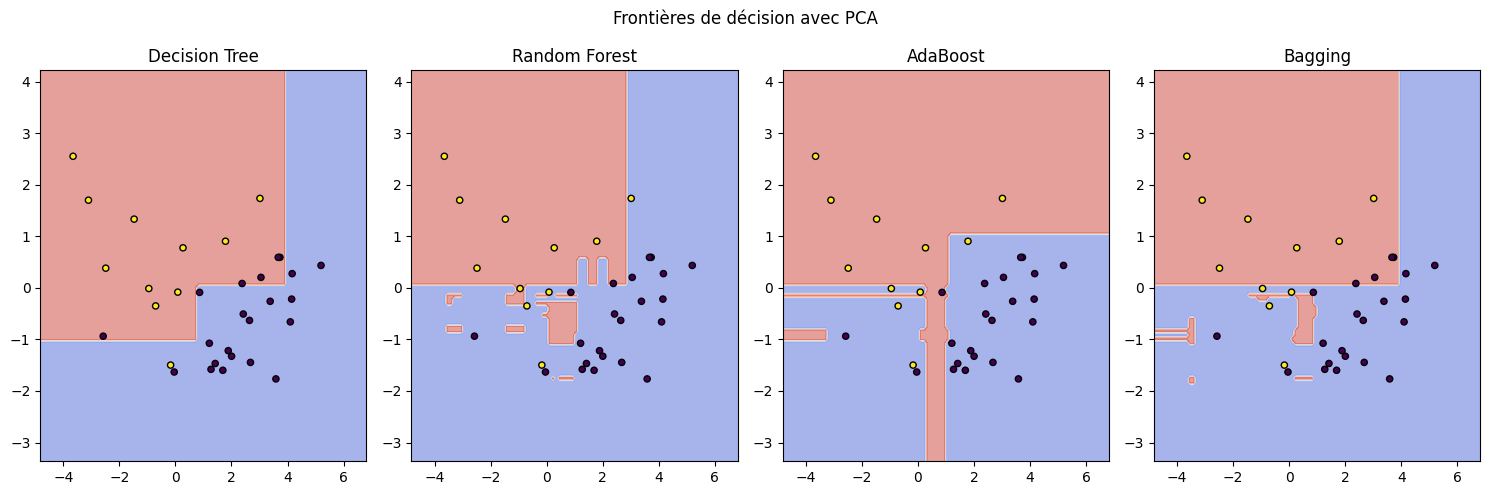

c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


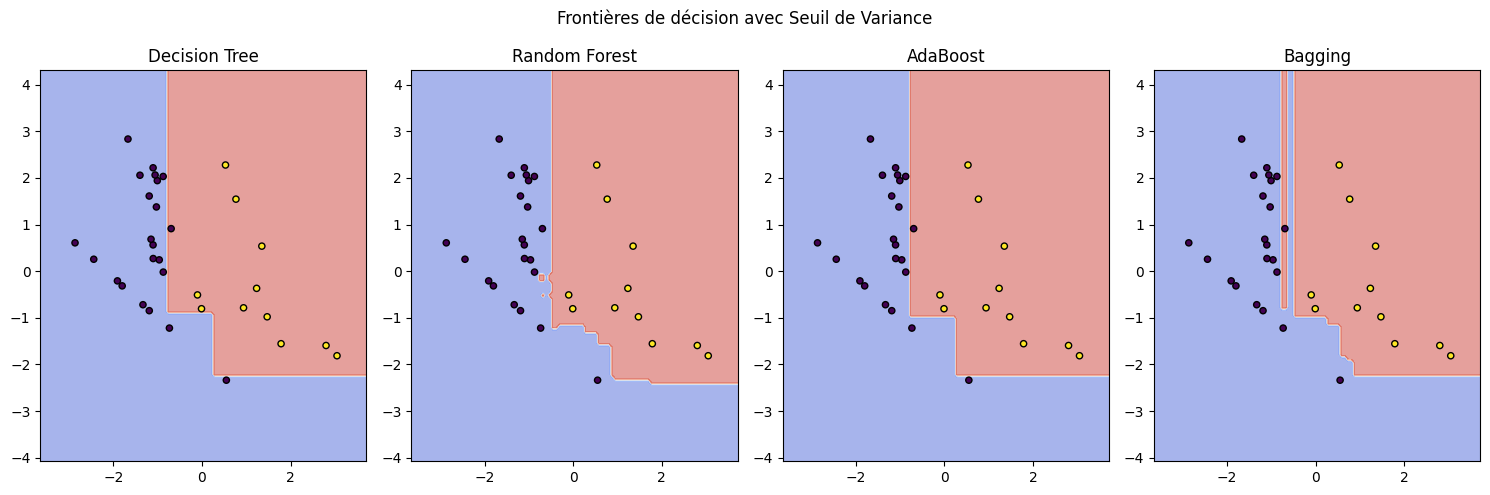

c:\Users\Luca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


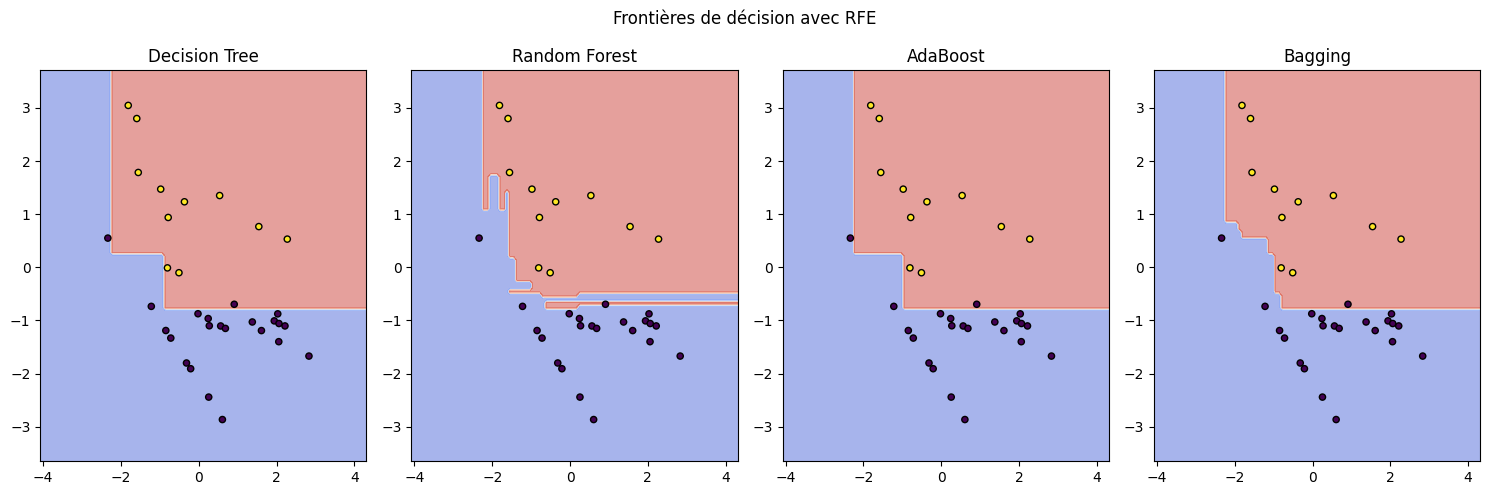


Résumé des résultats :
Modèle               Méthode de sélection      Précision Entraînement Précision Test  Meilleures Caractéristiques
----------------------------------------------------------------------------------------------------
Decision Tree        Importance des Caractéristiques 0.99            0.91            [7 8]               
Random Forest        Importance des Caractéristiques 1.00            1.00            [7 8]               
AdaBoost             Importance des Caractéristiques 1.00            0.91            [7 8]               
Bagging              Importance des Caractéristiques 1.00            0.97            [7 8]               
Decision Tree        PCA                       0.90            0.82            N/A (Composantes)   
Random Forest        PCA                       1.00            0.85            N/A (Composantes)   
AdaBoost             PCA                       1.00            0.85            N/A (Composantes)   
Bagging              PCA             

In [138]:
# Importation des bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, RFE

# Génération du jeu de données
X, y = make_classification(n_samples=100, n_features=10, n_informative=2, n_redundant=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Modèles d'ensemble
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=123),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=123),
    'AdaBoost': AdaBoostClassifier(n_estimators=20, random_state=123),
    'Bagging': BaggingClassifier(n_estimators=10, random_state=123)
}

# Fonction pour entraîner et tester chaque modèle avec affichage de la frontière de décision
def train_and_plot(models, X_train, X_test, y_train, y_test, method_name, top_features):
    fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
    fig.suptitle(f"Frontières de décision avec {method_name}")
    results = []

    for idx, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        
        # Ajout des résultats dans le tableau final
        results.append((name, method_name, accuracy_train, accuracy_test, top_features))

        # Affichage de la frontière de décision
        ax = axes[idx]
        display = DecisionBoundaryDisplay.from_estimator(
            model, X_train, response_method="predict", ax=ax, cmap="coolwarm", alpha=0.5
        )
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", s=20)
        ax.set_title(f"{name}")
        
    plt.tight_layout()
    plt.show()
    return results

# Méthode 1 : Importance des caractéristiques (Random Forest)
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
importance = rf.feature_importances_
top_features = np.argsort(importance)[-2:]
X_train_fi, X_test_fi = X_train[:, top_features], X_test[:, top_features]
results_fi = train_and_plot(models, X_train_fi, X_test_fi, y_train, y_test, "Importance des Caractéristiques", top_features)

# Méthode 2 : PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
results_pca = train_and_plot(models, X_train_pca, X_test_pca, y_train, y_test, "PCA", "N/A (Composantes)")

# Méthode 3 : Seuil de Variance
selector = VarianceThreshold(threshold=0.1)
X_train_vt = selector.fit_transform(X_train)
X_test_vt = selector.transform(X_test)
top_features_vt = np.argsort(selector.variances_)[-2:]
X_train_vt, X_test_vt = X_train[:, top_features_vt], X_test[:, top_features_vt]
results_vt = train_and_plot(models, X_train_vt, X_test_vt, y_train, y_test, "Seuil de Variance", top_features_vt)

# Méthode 4 : RFE
top_features_rfe = None
for name, clf in models.items():
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
    rfe.fit(X_train, y_train)
    top_features_rfe = np.where(rfe.support_)[0]
    break

X_train_rfe, X_test_rfe = X_train[:, top_features_rfe], X_test[:, top_features_rfe]
results_rfe = train_and_plot(models, X_train_rfe, X_test_rfe, y_train, y_test, "RFE", top_features_rfe)

# Résumé des résultats sous forme de tableau
print("\nRésumé des résultats :")
print("{:<20} {:<25} {:<15} {:<15} {:<20}".format("Modèle", "Méthode de sélection", "Précision Entraînement", "Précision Test", "Meilleures Caractéristiques"))
print("-" * 100)
all_results = results_fi + results_pca + results_vt + results_rfe
for result in all_results:
    # Convert result[4] (best features) to a string for printing
    best_features_str = str(result[4]) if isinstance(result[4], np.ndarray) else result[4]
    print("{:<20} {:<25} {:<15.2f} {:<15.2f} {:<20}".format(result[0], result[1], result[2], result[3], best_features_str))

### Q7

**Importance of characteristics:** Identifies the most influential characteristics based on their importance, here calculated by a RandomForestClassifier.

**PCA:** Reduces dimensionality by selecting the components that capture the most variance in the data.

**Variance Threshold:** Filters out features with a variance above a threshold, which may reveal relevant features.

**RFE:** Selects features recursively, eliminating the least important at each stage.

### Q8

The final table shows that each selection method identifies different characteristics. In general, Feature Importance and RFE give similar results, as they use estimates based on the features themselves. PCA can introduce variability by modifying the feature space. Model performance also varies according to the features selected, highlighting the importance of choosing methods that are adapted to the data structure.

# Part 3 application on a real dataset

You now have knowledge of different feature selection and ensemble methods. You are now going to apply them on a real dataset, another dataset extracted from Kaggle : [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data).
 
First, read the given csv by using pandas and analyze the dataset.

    Q9 : Describe the task proposed in this dataset.
 
Then, apply the different ensemble methods and feature selection methods previously seen on this dataset. You may keep only the numerical values for simplicity, but you can extend it to non-numerical values if you have time.  
 
    Q10 : Report the results in a tabular and propose an in-depth analysis.